# <u> Code </u>

## Problem Statement:

## The goal of this assignment is to improve the washingdc.jpg image contrast by histogram equalization 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Calculating the normalized histogram of an image

In [2]:
def imhist(im):
    m,n = im.shape
    h = [0,0] * 255
    for i in range(m):
            for j in range(n):
                    h[im[i,j]]+=1
    return np.array(h)/(m*n)
    

## Finds cumulative sum of a numpy array, list

In [3]:
def cumsum(h):
    return[sum(h[:i+1]) for i in range(len(h))]

# Calculate Histogram

In [4]:
def histeq(im):
    h = imhist(im)
    cdf = np.array(cumsum(h))  #cumulative distribution function
    sk = np.uint8(255*cdf) #finding transfer function values
    s1,s2 = im.shape #equivalent m,n
    Y = np.zeros_like(im)
    # applying transferred values for each pixels
    for i in range(0,s1):
            for j in range(0,s2):
                    Y[i,j] = sk[im[i,j]]
    H = imhist(Y)
    
    return Y,h,H,sk
    

## Main

In [5]:
def main():
    img = np.uint8(plt.imread('washdc512.jpg'))
    newimg,h,newh,sk = histeq(img)
    
    # Show Old and New Image 
    
    # Show Original Image
    plt.subplot(121)
    plt.imshow(img)
    plt.title('Original Image')
    plt.set_cmap('gray')
    
    #Show New Image
    plt.subplot(122)
    plt.imshow(newimg)
    plt.title('Histogram Equilization Image')
    plt.set_cmap('gray')
    plt.show()
    plt.imsave('washdc512histeqd.jpg', newimg, cmap = 'gray')
    
    #Plot histograms and transfer function
    
   
    fig = plt.figure()
    
     #Original Histogram
    fig.add_subplot(221)
    plt.plot(h)
    plt.title('Original Histogram')
    
    #Histogram of Equilized Image
    fig.add_subplot(222)
    plt.plot(newh)
    plt.title('New Histogram')
    
    
    plt.show()
    
    #Transfer Function
    plt.plot(sk)
    plt.title('Transfer Function')
    plt.show()
    
    
    
    

# <u> Results </u>

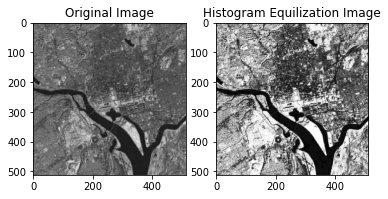

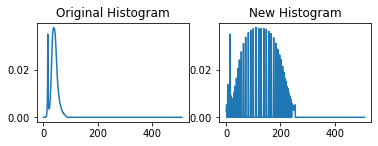

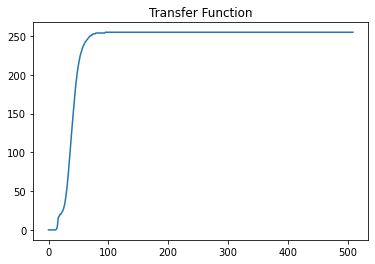

In [6]:
if __name__=='__main__':
    main()